# Basic Plotting Examples

This script contains basic examples in case you need a refresher on plotting syntax.

## Plotting Data

Some basic plotting stuff. Need the following libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Usually you would use the following command to set inline plots in notebooks. 

In [2]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


But if you want an interactive plot window, you can use the command below. Note: kernel may need to be restarted to switch between two plot outputs

Let's make a simple signal with some noise:

In [3]:
x1 = np.linspace(0,20,250)
y1 = np.sin(x1) + np.random.random_sample(len(x1))  # create signal with noise

Now let's plot it, annotate the figure, and change the x and y axis limits.

(-1.5, 2.5)

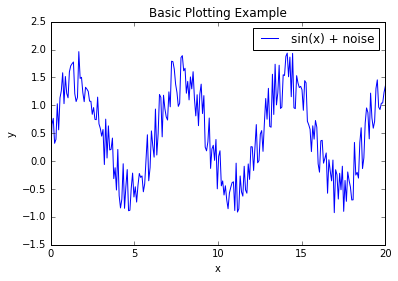

In [4]:
f1, axh = plt.subplots(1)  # create figure (can also make matrix, change fig size, etc.)

axh.plot(x1, y1, label="sin(x) + noise")
axh.set_title("Basic Plotting Example")
axh.set_xlabel("x")
axh.set_ylabel("y")
axh.legend()

axh.set_xlim([0,20])
axh.set_ylim([-1.5,2.5])

We can also use a simpler set of plotting commands. Less explicit commmands ("plt" vs using specific axis handle), but it's good enough for single and quick plotting:

(-1.5, 2.5)

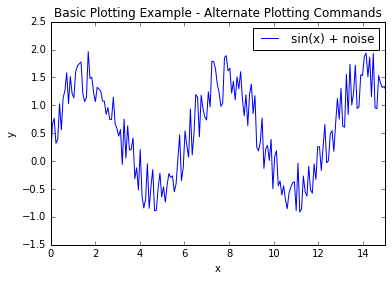

In [5]:
plt.plot(x1,y1,label="sin(x) + noise")

plt.title("Basic Plotting Example - Alternate Plotting Commands")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.xlim([0,15])
plt.ylim([-1.5,2.5])

We can make a second set of data to plot it on top of the first data set:

In [6]:
y2 = 100*(np.cos(x1) + np.random.random_sample(len(x1)))

Plotting it on the same graph:

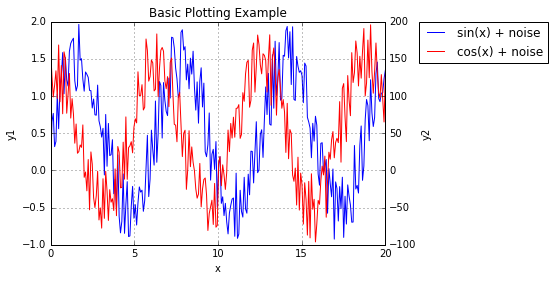

In [7]:
f1, axh = plt.subplots(1)
axh2 = axh.twinx()

ln1 = axh.plot(x1, y1, label="sin(x) + noise")
ln2 = axh2.plot(x1, y2, label="cos(x) + noise", color='r')
    
axh.set_title("Basic Plotting Example")
axh.set_xlabel("x")
axh.set_ylabel("y1")
axh2.set_ylabel("y2")

axh.grid(True)

# Do this to put both labels in the same legend
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
axh.legend(lns, labs, bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0)

## Three Ways to Make Polar Plots
Because this is Python, you can either use:
+ plt.polar()
+ plt.subplot()
+ plt.subplots()

The examples below show the different syntax associated with each.

In [8]:
# Some standard line data
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

### Method 1: plt.polar()
This is the easiest/fastest, but provides least amount of flexibility.

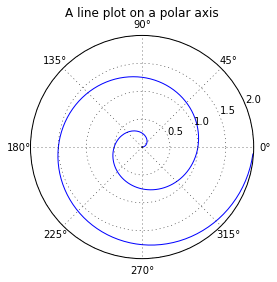

In [9]:
plt.polar(theta,r)

plt.title('A line plot on a polar axis', va='bottom')
plt.show()

### Method 2: plt.subplot()
Returns axis handle.

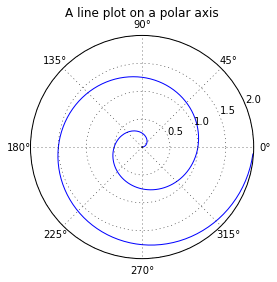

In [10]:
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

### Method 3: plt.subplots()
Probably the most useful plotting call since it returns both the figure and axis handle.

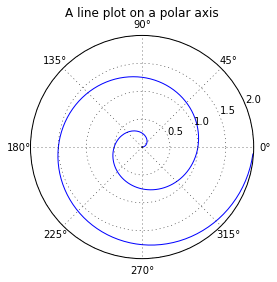

In [11]:
fig, ax = plt.subplots(1, subplot_kw=dict(projection='polar'))
ax.plot(theta, r)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

## Fancier Plotting Commands

Populating the interactive namespace from numpy and matplotlib


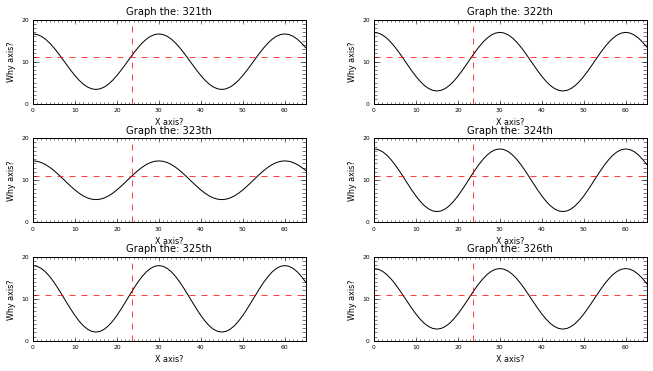

In [12]:
import pandas as pd  # Pandas dataframes very cool for data analysis stuff
import numpy as np  # Numpy is math functionality 

import pylab as pl
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import time, csv, os

%pylab inline  

# Make a fig / variable for subplots
r = np.arange(6) + 321
fig = plt.figure(figsize=(11,8.5))

for i in r:
    # Something to plot
    x = np.arange(66)
    y = 4*(np.random.random()+1)*np.cos(np.pi*x*24/360) + 10

    # Create something to act on and plot it
    ax = fig.add_subplot(i, autoscale_on=True)
    ax.plot(x,y,'k')

    # Scale the axis of the thing you plotted
    ax.axis('scaled')
    ax.axis([0,65, 0,20])

    #Set up some labels
    ax.set_xlabel('X axis?', size=8)
    ax.set_ylabel('Why axis?', size=8)
    title='Graph the: ' + str(i) + 'th'
    ax.set_title(title, size=10)

    #Locate a single point with 2 lines
    ax.axhline(y=11, color='r', linestyle='--', linewidth=0.75)
    ax.axvline(x=23.5, color='r', linestyle='--', linewidth=0.75)
    
    #Set the tick distribution for x and y
    ax.xaxis.set_major_locator(tkr.MaxNLocator(7))
    ax.xaxis.set_minor_locator(tkr.MaxNLocator(65))
    ax.yaxis.set_major_locator(tkr.MaxNLocator(2))
    ax.yaxis.set_minor_locator(tkr.MaxNLocator(20))

    #Set X tick attributes
    for xticka in ax.xaxis.get_major_ticks():
        xticka.tick2line.set_markersize(4)
        xticka.tick1line.set_markersize(4)
        xticka.label1.set_fontsize(6)
    
    for xticki in ax.xaxis.get_minor_ticks():
        xticki.tick2line.set_markersize(2)
        xticki.tick1line.set_markersize(2)

    #Set Y tick attributes
    for yticka in ax.yaxis.get_major_ticks():
        yticka.tick2line.set_markersize(6)
        yticka.tick1line.set_markersize(6)
        yticka.label1.set_fontsize(6)
    
    for yticki in ax.yaxis.get_minor_ticks():
        yticki.tick2line.set_markersize(4)
        yticki.tick1line.set_markersize(3)

# Save as png
#pl.savefig('plotter2', dpi=250, papertype='letter', orientation='landscape')
        
#adjustments to make sure text is readable
plt.subplots_adjust(wspace=0.25, hspace=-0.5)
plt.show()